In [7]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [10]:
# Reading file from github dataset repository
terror_data_path = 'https://raw.githubusercontent.com/ChadCRead/Class-Datasets/main/raw_full_terror_data.csv'
td = pd.read_csv(terror_data_path)

In [11]:
# Overview of data
td.head()

,latitude,longitude,nkill,iyear
0,18.456792,-69.951164,1.0,1970
1,19.371887,-99.086624,0.0,1970
2,15.478598,120.599741,1.0,1970
3,37.997490,23.762728,0.0,1970
4,33.580412,130.396361,0.0,1970


Text(0.5, 1.0, 'Number of terrorist events by year')

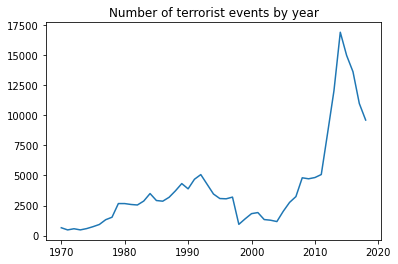

In [20]:
# Basic trend plot of terrorist events since 1970 (start of dataset)
td_counts = td.groupby(['iyear'])['nkill'].count().reset_index()

plt.plot(td_counts.iloc[:,0], td_counts.iloc[:,1])
plt.title("Number of terrorist events by year")

Text(0.5, 1.0, 'Number of terrorist event DEATHS by year')

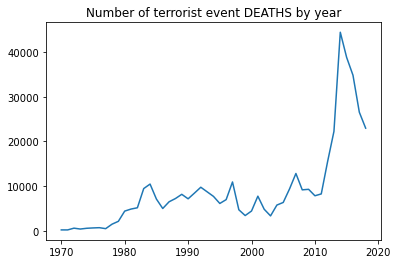

In [35]:
# Basic trend plot of terrorist event DEATHS since 1970 (start of dataset)
td_deaths = td.groupby(['iyear'])['nkill'].sum().reset_index()

plt.clf()
plt.plot(td_deaths.iloc[:,0], td_deaths.iloc[:,1])
plt.title("Number of terrorist event DEATHS by year")

In [32]:
# Removing data older than 2001 to capture more recent trends in terrorism
modern_td = td[td['iyear'] >= 2001].reset_index(drop=True)

,latitude,longitude,nkill,iyear
0,3.800889,-76.641271,3.0,2001
1,12.825647,44.846416,0.0,2001
2,4.598100,-74.076030,0.0,2001
3,41.106178,28.689863,0.0,2001
4,34.666667,3.250000,5.0,2001


Text(0.5, 1.0, 'Number of terrorist events by year')

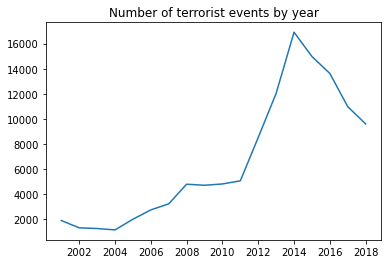

In [38]:
# Looking at closer view of modern terror data events by year
modern_td_counts = modern_td.groupby(['iyear'])['nkill'].count().reset_index()

plt.plot(modern_td_counts.iloc[:,0], modern_td_counts.iloc[:,1])
plt.locator_params(axis='x', nbins=16)
plt.title("Number of terrorist events by year")

Text(0.5, 1.0, 'Number of terrorist events by year')

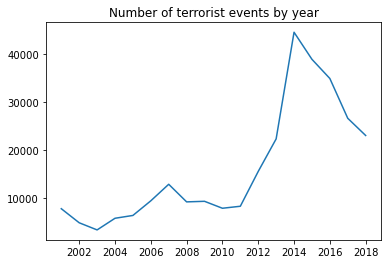

In [39]:
# Looking at closer view of modern terror data DEATHS by year
modern_td_counts = modern_td.groupby(['iyear'])['nkill'].sum().reset_index()

plt.plot(modern_td_counts.iloc[:,0], modern_td_counts.iloc[:,1])
plt.locator_params(axis='x', nbins=16)
plt.title("Number of terrorist events by year")

Text(0.5, 1.0, 'Number of terrorist events by year')

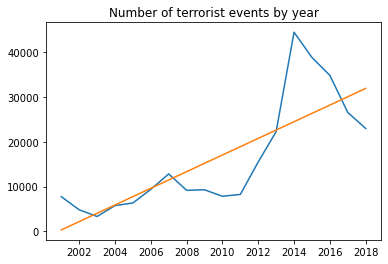

In [42]:
# Plotting a basic regression line to the recent data
m, b = np.polyfit(modern_td_counts.iloc[:,0], modern_td_counts.iloc[:,1], 1)

plt.plot(modern_td_counts.iloc[:,0], modern_td_counts.iloc[:,1])
plt.plot(modern_td_counts.iloc[:,0], (m * modern_td_counts.iloc[:,0]) + b)
plt.locator_params(axis='x', nbins=16)
plt.title("Number of terrorist events by year")

In [ ]:
# Saving the modern data to another csv file
modern_td.to_csv("modern_terror_data.csv")